In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-delivery/deliveries.csv
/kaggle/input/matches-data/matches.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
data_delivery= pd.read_csv("../input/data-delivery/deliveries.csv")
data_delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
data_delivery.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [5]:
data_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
data_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
data_delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


<AxesSubplot:>

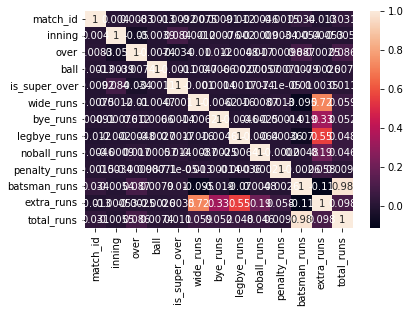

In [8]:
%matplotlib inline
correlation_delivery= data_delivery.corr()
sns.heatmap(correlation_delivery,annot=True)

In [9]:
data_delivery.median()

match_id         379.0
inning             1.0
over              10.0
ball               4.0
is_super_over      0.0
wide_runs          0.0
bye_runs           0.0
legbye_runs        0.0
noball_runs        0.0
penalty_runs       0.0
batsman_runs       1.0
extra_runs         0.0
total_runs         1.0
dtype: float64

In [10]:
#missing data through percentage list 
for col in data_delivery.columns:
    pct_missing = np.mean(data_delivery[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

match_id - 0%
inning - 0%
batting_team - 0%
bowling_team - 0%
over - 0%
ball - 0%
batsman - 0%
non_striker - 0%
bowler - 0%
is_super_over - 0%
wide_runs - 0%
bye_runs - 0%
legbye_runs - 0%
noball_runs - 0%
penalty_runs - 0%
batsman_runs - 0%
extra_runs - 0%
total_runs - 0%
player_dismissed - 95%
dismissal_kind - 95%
fielder - 96%


from the above percentage list it shows that player_dismissed, dismissal_kind, fielder have maximum missing values therefore we should leave these columns

since we know that these data sets have more missing data around 95% so we will simply drop these columns 

In [11]:
cols_to_drop=['player_dismissed']
data_delivery_player_dismiss=data_delivery.drop(cols_to_drop,axis=1)

In [12]:
cols_to_drop=['dismissal_kind']
data_delivery_dismissal_kind= data_delivery.drop(cols_to_drop,axis=1)

In [13]:
cols_to_drop=['fielder']
data_delivery_feilder=data_delivery.drop(cols_to_drop,axis=1)

In [14]:
data_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [15]:
data_delivery['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [16]:
data_delivery['match_id']=data_delivery['match_id'].fillna(data_delivery['match_id'].median())

In [17]:
data_delivery['inning'].unique()

array([1, 2, 3, 4, 5])

In [18]:
data_delivery['inning']=data_delivery['inning'].fillna(data_delivery['inning'].median())

In [19]:
data_delivery['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
data_delivery['batting_team']=data_delivery['batting_team'].fillna('None')

In [21]:
data_delivery['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [22]:
data_delivery['bowling_team']=data_delivery['bowling_team'].fillna('None')

In [23]:
data_delivery['over'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [24]:
data_delivery['over']=data_delivery['over'].fillna(data_delivery['over'].median())

In [25]:
data_delivery['ball'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
data_delivery['ball']=data_delivery['ball'].fillna(data_delivery['ball'].median())

In [27]:
data_delivery['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [28]:
data_delivery['batsman']=data_delivery['batsman'].fillna('None')

In [29]:
data_delivery['non_striker'].unique()

array(['S Dhawan', 'DA Warner', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'Mandeep Singh', 'CH Gayle', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'TS Mills', 'YS Chahal', 'A Choudhary', 'JC Buttler', 'PA Patel',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'MJ McClenaghan', 'MA Agarwal',
       'AM Rahane', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'BB McCullum',
       'JJ Roy', 'SK Raina', 'AJ Finch', 'KD Karthik', 'DR Smith',
       'CA Lynn', 'G Gambhir', 'MK Tiwary', 'DT Christian', 'R Bhatia',
       'M Vohra', 'HM Amla', 'WP Saha', 'AR Patel', 'GJ Maxwell',
       'DA Miller', 'Vishnu Vinod', 'P Negi', 'Iqbal Abdulla',
       'SW Billings', 'AP Tare', 'KK Nair', 'SV Samson', 'RR Pant',
       'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra', 'Z Khan',
       'DS Kulkarni', 'P Kumar', 'Basil Thampi', 'MK Pandey', 'YK Pathan',
       'SA Yadav', 'CR

In [30]:
data_delivery['non_striker']=data_delivery['non_striker'].fillna('None')

In [31]:
data_delivery['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [32]:
data_delivery['bowler']=data_delivery['bowler'].fillna('None')

In [33]:
data_delivery['is_super_over'].unique()

array([0, 1])

In [34]:
data_delivery['is_super_over']=data_delivery['is_super_over'].fillna(data_delivery['is_super_over'].median())

In [35]:
data_delivery['wide_runs'].unique()

array([0, 2, 1, 5, 3, 4])

In [36]:
data_delivery['wide_runs']=data_delivery['wide_runs'].fillna(data_delivery['wide_runs'].median())

In [37]:
data_delivery['bye_runs'].unique()

array([0, 1, 4, 2, 3])

In [38]:
data_delivery['bye_runs']=data_delivery['bye_runs'].fillna(data_delivery['bye_runs'].median())

In [39]:
data_delivery['legbye_runs'].unique()

array([0, 1, 2, 5, 3, 4])

In [40]:
data_delivery['legbye_runs']=data_delivery['legbye_runs'].fillna(data_delivery['legbye_runs'].median())

In [41]:
data_delivery['noball_runs'].unique()

array([0, 1, 2, 5, 3])

In [42]:
data_delivery['noball_runs']=data_delivery['noball_runs'].fillna(data_delivery['noball_runs'].median())

In [43]:
data_delivery['penalty_runs'].unique()

array([0, 5])

In [44]:
data_delivery['penalty_runs']=data_delivery['penalty_runs'].fillna(data_delivery['penalty_runs'].median())

In [45]:
data_delivery['batsman_runs'].unique()

array([0, 4, 1, 6, 3, 2, 5, 7])

In [46]:
data_delivery['batsman_runs']=data_delivery['batsman_runs'].fillna(data_delivery['batsman_runs'].median())

In [47]:
data_delivery['extra_runs'].unique()

array([0, 2, 1, 4, 5, 3, 7])

In [48]:
data_delivery['extra_runs']=data_delivery['extra_runs'].fillna(data_delivery['extra_runs'].median())

In [49]:
data_delivery['total_runs'].unique()

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8])

In [50]:
data_delivery['total_runs']=data_delivery['total_runs'].fillna(data_delivery['total_runs'].median())

In [51]:
data_match=pd.read_csv('../input/matches-data/matches.csv')
data_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [52]:
data_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [53]:
data_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [54]:
data_match.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [55]:
data_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

<AxesSubplot:>

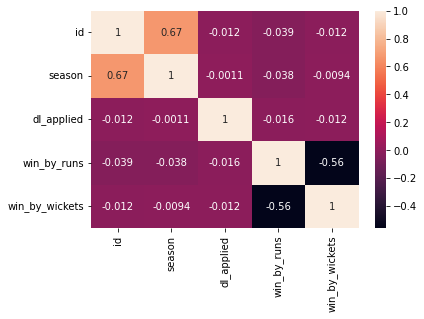

In [56]:
correlation_match=data_match.corr()
sns.heatmap(correlation_match,annot=True)

In [57]:
#finding out the missing data from dataset through percentage list 
for col in data_match.columns:
    pct_missing= np.mean(data_match[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
season - 0%
city - 1%
date - 0%
team1 - 0%
team2 - 0%
toss_winner - 0%
toss_decision - 0%
result - 0%
dl_applied - 0%
winner - 1%
win_by_runs - 0%
win_by_wickets - 0%
player_of_match - 1%
venue - 0%
umpire1 - 0%
umpire2 - 0%
umpire3 - 84%


In [58]:
data_match['id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [59]:
data_match['id']=data_match['id'].fillna(data_match['id'].median())

In [60]:
data_match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [61]:
data_match['season']=data_match['season'].fillna(data_match['season'].median())

In [62]:
data_match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [63]:
data_match['city']=data_match['city'].fillna('None')

In [64]:
data_match['date'].unique()

array(['2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
       '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
       '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
       '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
       '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
       '2017-04-26', '2017-04-27', '2017-04-28', '2017-04-29',
       '2017-04-30', '2017-05-01', '2017-05-02', '2017-05-03',
       '2017-05-04', '2017-05-05', '2017-05-06', '2017-05-07',
       '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
       '2017-05-12', '2017-05-13', '2017-05-14', '2017-05-16',
       '2017-05-17', '2017-05-19', '2017-05-21', '2008-04-18',
       '2008-04-19', '2008-04-20', '2008-04-21', '2008-04-22',
       '2008-04-23', '2008-04-24', '2008-04-25', '2008-04-26',
       '2008-04-27', '2008-04-28', '2008-04-29', '2008-04-30',
       '2008-05-01', '2008-05-02', '2008-05-25', '2008-05-03',
       '2008-05-04', '2008-05-05', '2008-05-06', '2008-

In [65]:
data_match['date']=data_match['date'].fillna('None')

In [66]:
data_match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [67]:
data_match['team1']=data_match['team1'].fillna('None')

In [68]:
data_match['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [69]:
data_match['team2']=data_match['team2'].fillna('None')

In [70]:
data_match['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [71]:
data_match['toss_winner']=data_match['toss_winner'].fillna('None')

In [72]:
data_match['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [73]:
data_match['toss_decision']=data_match['toss_decision'].fillna('None')

In [74]:
data_match['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [75]:
data_match['result']=data_match['result'].fillna('None')

In [76]:
data_match['dl_applied'].unique()

array([0, 1])

In [77]:
data_match['dl_applied']=data_match['dl_applied'].fillna('None')

In [78]:
data_match['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [79]:
data_match['winner']=data_match['winner'].fillna('None')

In [80]:
data_match['win_by_runs'].unique()

array([ 35,   0,  15,  97,  17,  51,  27,   5,  21,  14,  26,  82,   3,
        61,  48,  19,  12, 146,   7,   9,  10,  20,   1, 140,  33,   6,
        66,  13,  45,  29,  18,  23,  41,  65,  25, 105,  75,  92,  11,
        24,  38,   8,  78,  16,  53,   2,   4,  31,  55,  98,  34,  36,
        39,  40,  67,  63,  37,  57,  22,  85,  32,  76, 111,  43,  58,
        28,  74,  42,  59,  46,  47,  86,  44,  87, 130,  60,  77,  30,
        50,  93,  72,  62, 138,  71, 144,  80,  64, 102, 118])

In [81]:
data_match['win_by_runs']=data_match['win_by_runs'].fillna(data_match['win_by_runs'].median())

In [82]:
data_match['win_by_wickets'].unique()

array([ 0,  7, 10,  6,  9,  4,  8,  5,  2,  3,  1])

In [83]:
data_match['win_by_wickets']=data_match['win_by_wickets'].fillna(data_match['win_by_wickets'].median())

In [84]:
data_match['player_of_match'].unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

In [85]:
data_match['player_of_match']=data_match['player_of_match'].fillna('None')

In [86]:
data_match['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [87]:
data_match['venue']=data_match['venue'].fillna('None')

In [88]:
data_match['umpire1'].unique()

array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'K Ananthapadmanabhan', 'O Nandan', 'A Nanda Kishore',
       'Vineet Kulkarni', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'Anil Dandekar', 'Yeshwant Barde', 'Ian Gould',
       'Ulhas Gandhe', 'Nan

In [89]:
data_match['umpire1']=data_match['umpire1'].fillna('None')

In [90]:
data_match['umpire2'].unique()

array(['NJ Llong', 'S Ravi', 'CK Nandan', 'C Shamshuddin', nan,
       'AK Chaudhary', 'Nitin Menon', 'A Deshmukh', 'VK Sharma',
       'M Erasmus', 'CB Gaffaney', 'A Nand Kishore', 'RE Koertzen',
       'SL Shastri', 'GA Pratapkumar', 'DJ Harper', 'K Hariharan',
       'RB Tiffin', 'AM Saheba', 'MR Benson', 'IL Howell',
       'AV Jayaprakash', 'I Shivram', 'BR Doctrove', 'BG Jerling',
       'SJ Davis', 'SD Ranade', 'SJA Taufel', 'TH Wijewardene',
       'SK Tarapore', 'HDPK Dharmasena', 'SS Hazare', 'PR Reiffel',
       'AL Hill', 'RJ Tucker', 'VA Kulkarni', 'JD Cloete', 'BNJ Oxenford',
       'S Asnani', 'S Das', 'K Srinath', 'Subroto Das', 'RK Illingworth',
       'PG Pathak', 'K Srinivasan', 'SD Fry', 'A Nanda Kishore',
       'K Ananthapadmanabhan', 'A.D Deshmukh', 'Vineet Kulkarni',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'O Nandan', 'Virender Kumar Sharma', 'Yeshwant Barde',
       'Anil Dandekar', 'Kumar Dharmasena', 'KN Anantapadmanabha

In [91]:
data_match['umpire2']=data_match['umpire2'].fillna('None')

In [92]:
data_match['umpire3'].unique()

array([nan, 'Anil Chaudhary', 'Nitin Menon', 'S Ravi', 'O Nandan',
       'A Nanda Kishore', 'Vineet Kulkarni', 'C Shamshuddin',
       'Rod Tucker', 'Chris Gaffaney', 'A.D Deshmukh', 'Nigel Llong',
       'K Ananthapadmanabhan', 'Anil Dandekar', 'Virender Kumar Sharma',
       'Yeshwant Barde', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'KN Anantapadmanabhan', 'Ulhas Gandhe',
       'Nanda Kishore', 'Ian Gould', 'Sundaram Ravi',
       'KN Ananthapadmanabhan', 'Chettithody Shamshuddin'], dtype=object)

In [93]:
data_match['umpire3']=data_match['umpire3'].fillna('None')

# Data Visualization of delivery dataset 

In [94]:
data_delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


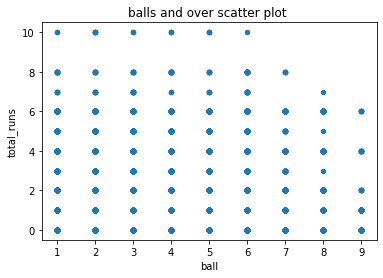

In [95]:
%matplotlib inline
data_delivery.plot(kind='scatter',x='ball',y='total_runs')
plt.title('balls and over scatter plot ')
plt.show()

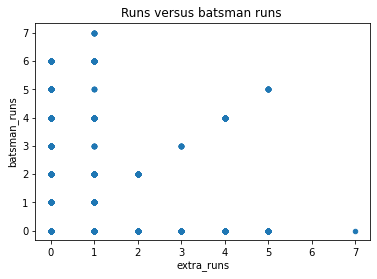

In [96]:
%matplotlib inline
data_delivery.plot(kind='scatter',x='extra_runs',y='batsman_runs')
plt.title('Runs versus batsman runs ')
plt.show()

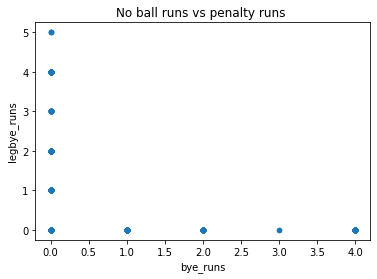

In [97]:
%matplotlib inline
data_delivery.plot(kind='scatter',x='bye_runs',y='legbye_runs')
plt.title('No ball runs vs penalty runs ')
plt.show()

In [98]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import pandas as pd 
%matplotlib notebook 

<AxesSubplot:ylabel='Frequency'>

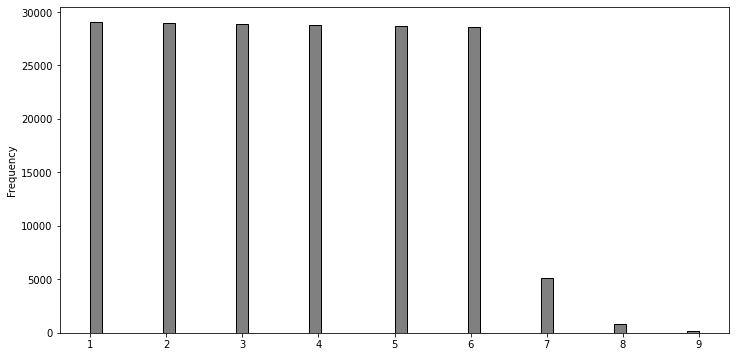

In [99]:
%matplotlib inline
data_delivery['ball'].plot(kind='hist',bins=50,figsize=(12,6),facecolor='grey',edgecolor='black')


<AxesSubplot:ylabel='Frequency'>

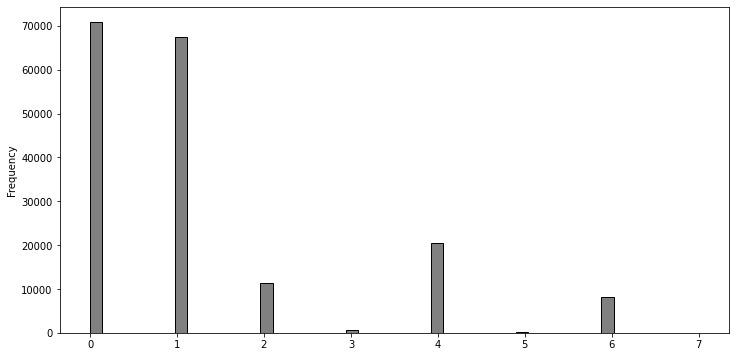

In [100]:
%matplotlib inline
data_delivery['batsman_runs'].plot(kind='hist',bins=50,figsize=(12,6),facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

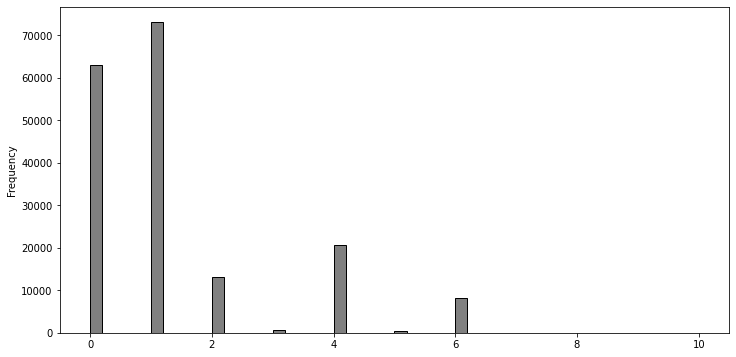

In [101]:
%matplotlib inline
data_delivery['total_runs'].plot(kind='hist',figsize=(12,6),bins=50,facecolor='grey',edgecolor='black')

<AxesSubplot:>

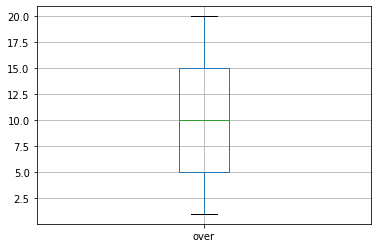

In [102]:
%matplotlib inline
data_delivery.boxplot('over')

<AxesSubplot:>

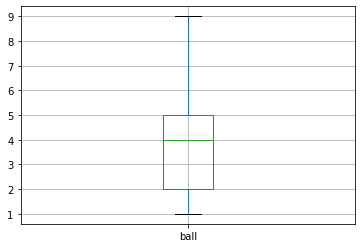

In [103]:
%matplotlib inline
data_delivery.boxplot('ball')

# Data Visualization of Match Dataset 

In [104]:
data_match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,None
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,None
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,None
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,None,None,None


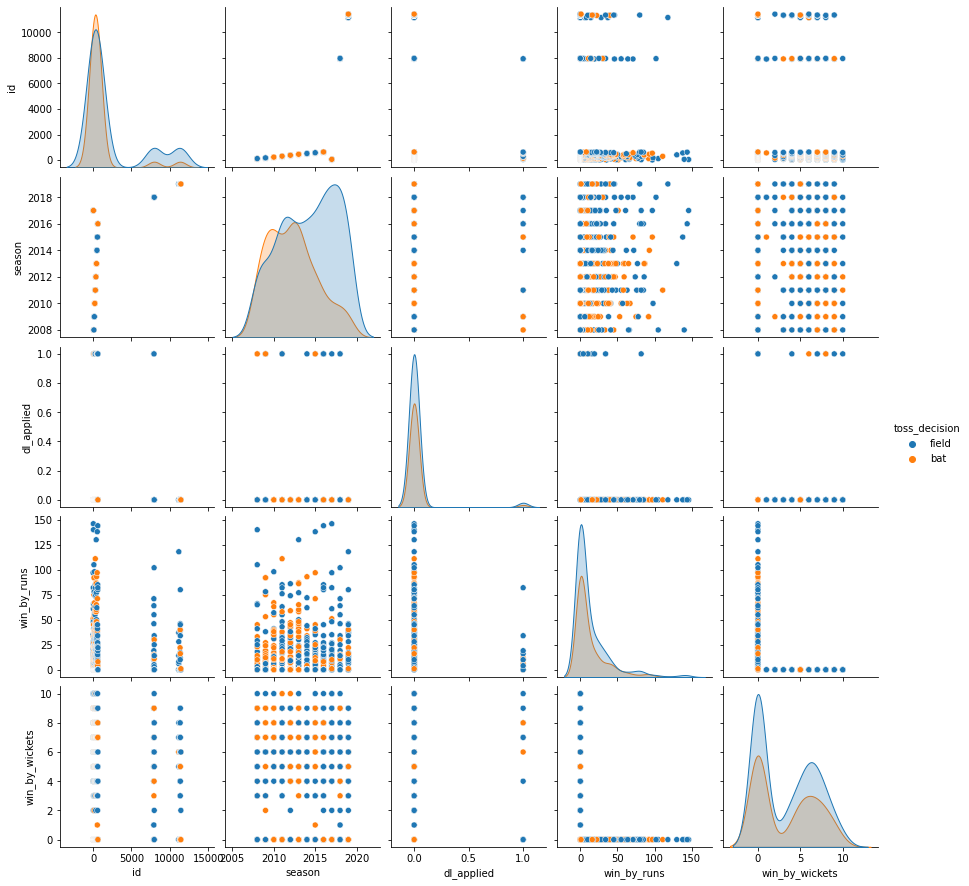

In [105]:
sns.pairplot(data_match,hue='toss_decision')

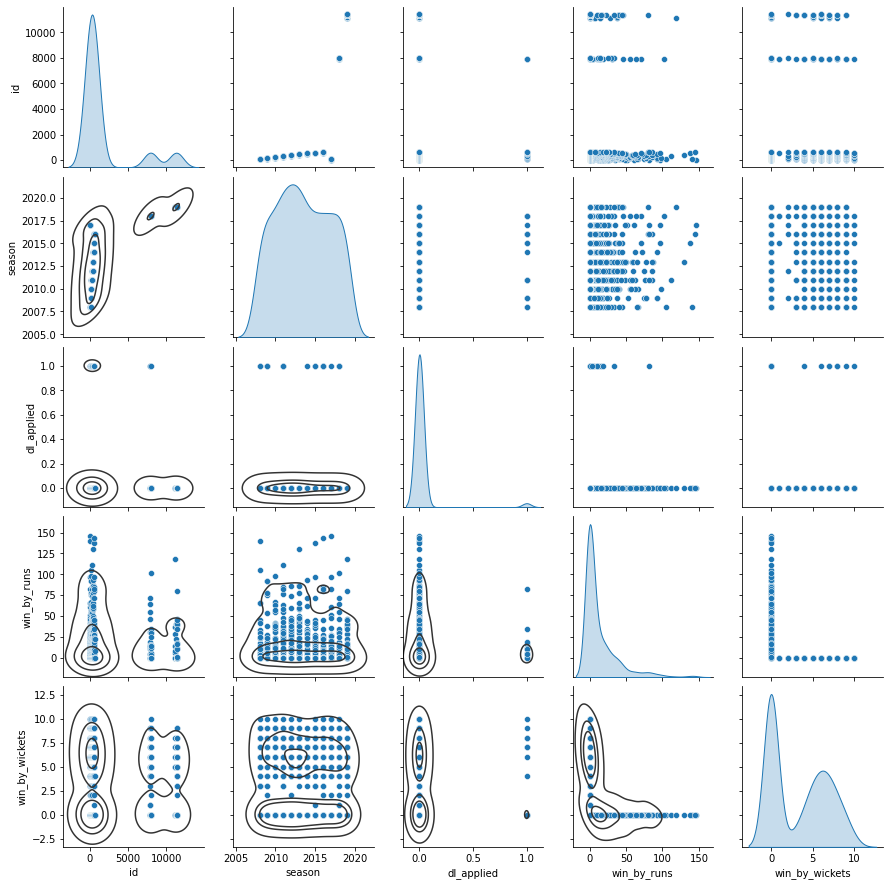

In [106]:
g=sns.pairplot(data_match,diag_kind='kde')
g.map_lower(sns.kdeplot,levels=4,color='.2')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'comparision between team1 and team2'}, xlabel='team1', ylabel='team2'>

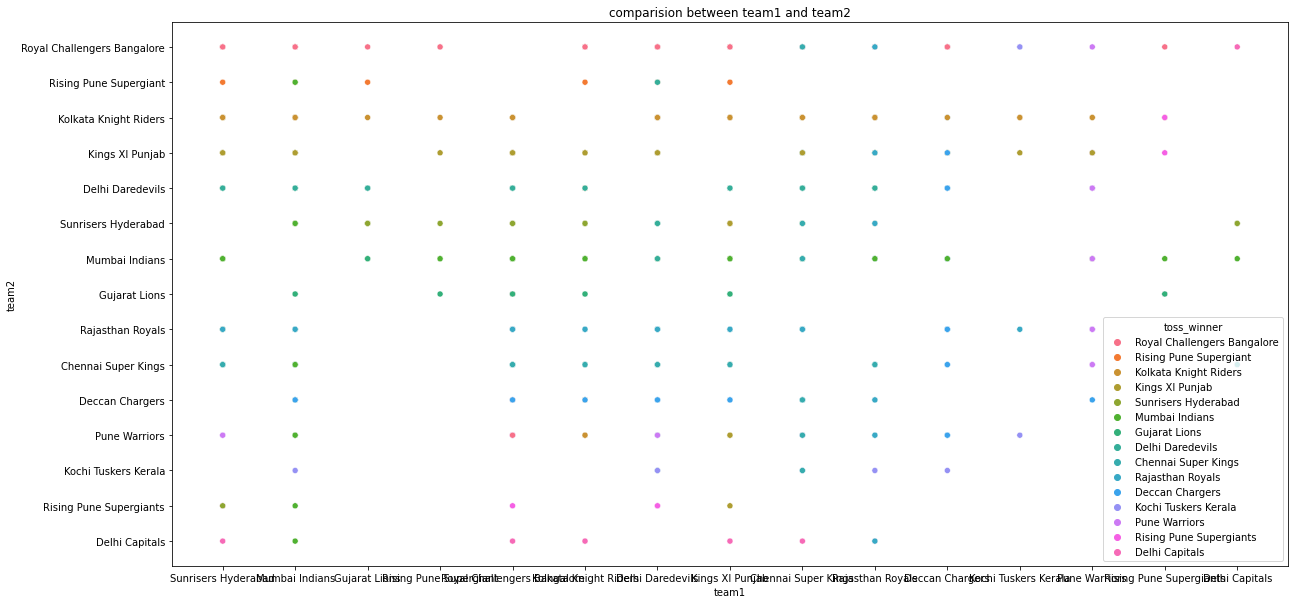

In [107]:
plt.figure(figsize=(20,10))
plt.title('comparision between team1 and team2')
sns.scatterplot(data_match['team1'],data_match['team2'],hue=data_match['toss_winner'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='team1', ylabel='team2'>

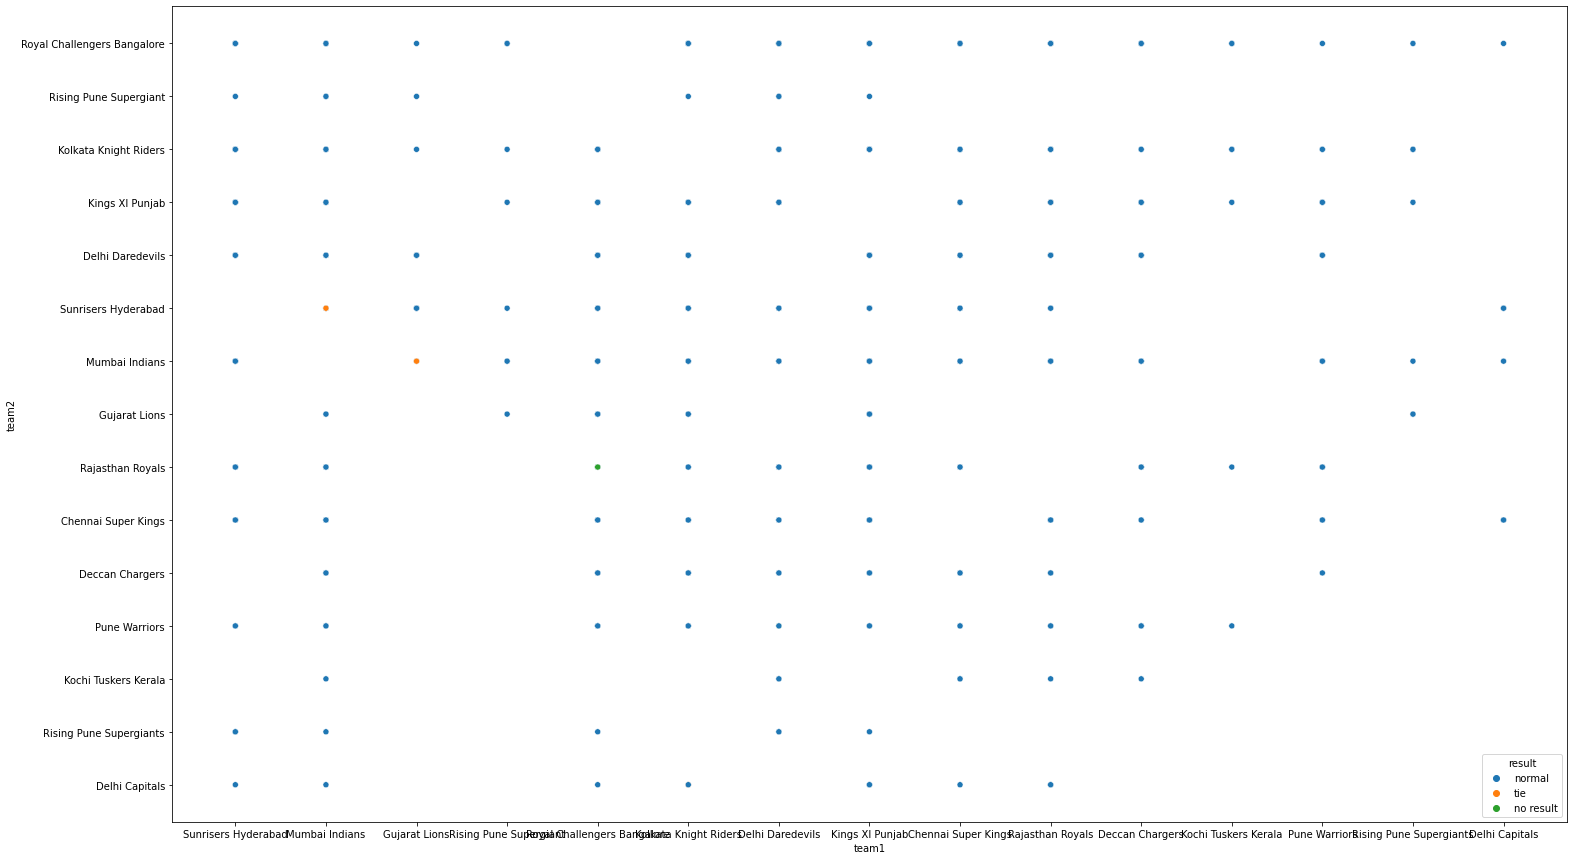

In [108]:
plt.figure(figsize=(25,15))
sns.scatterplot(data_match['team1'],data_match['team2'],hue=data_match['result'])

<AxesSubplot:xlabel='team2', ylabel='win_by_wickets'>

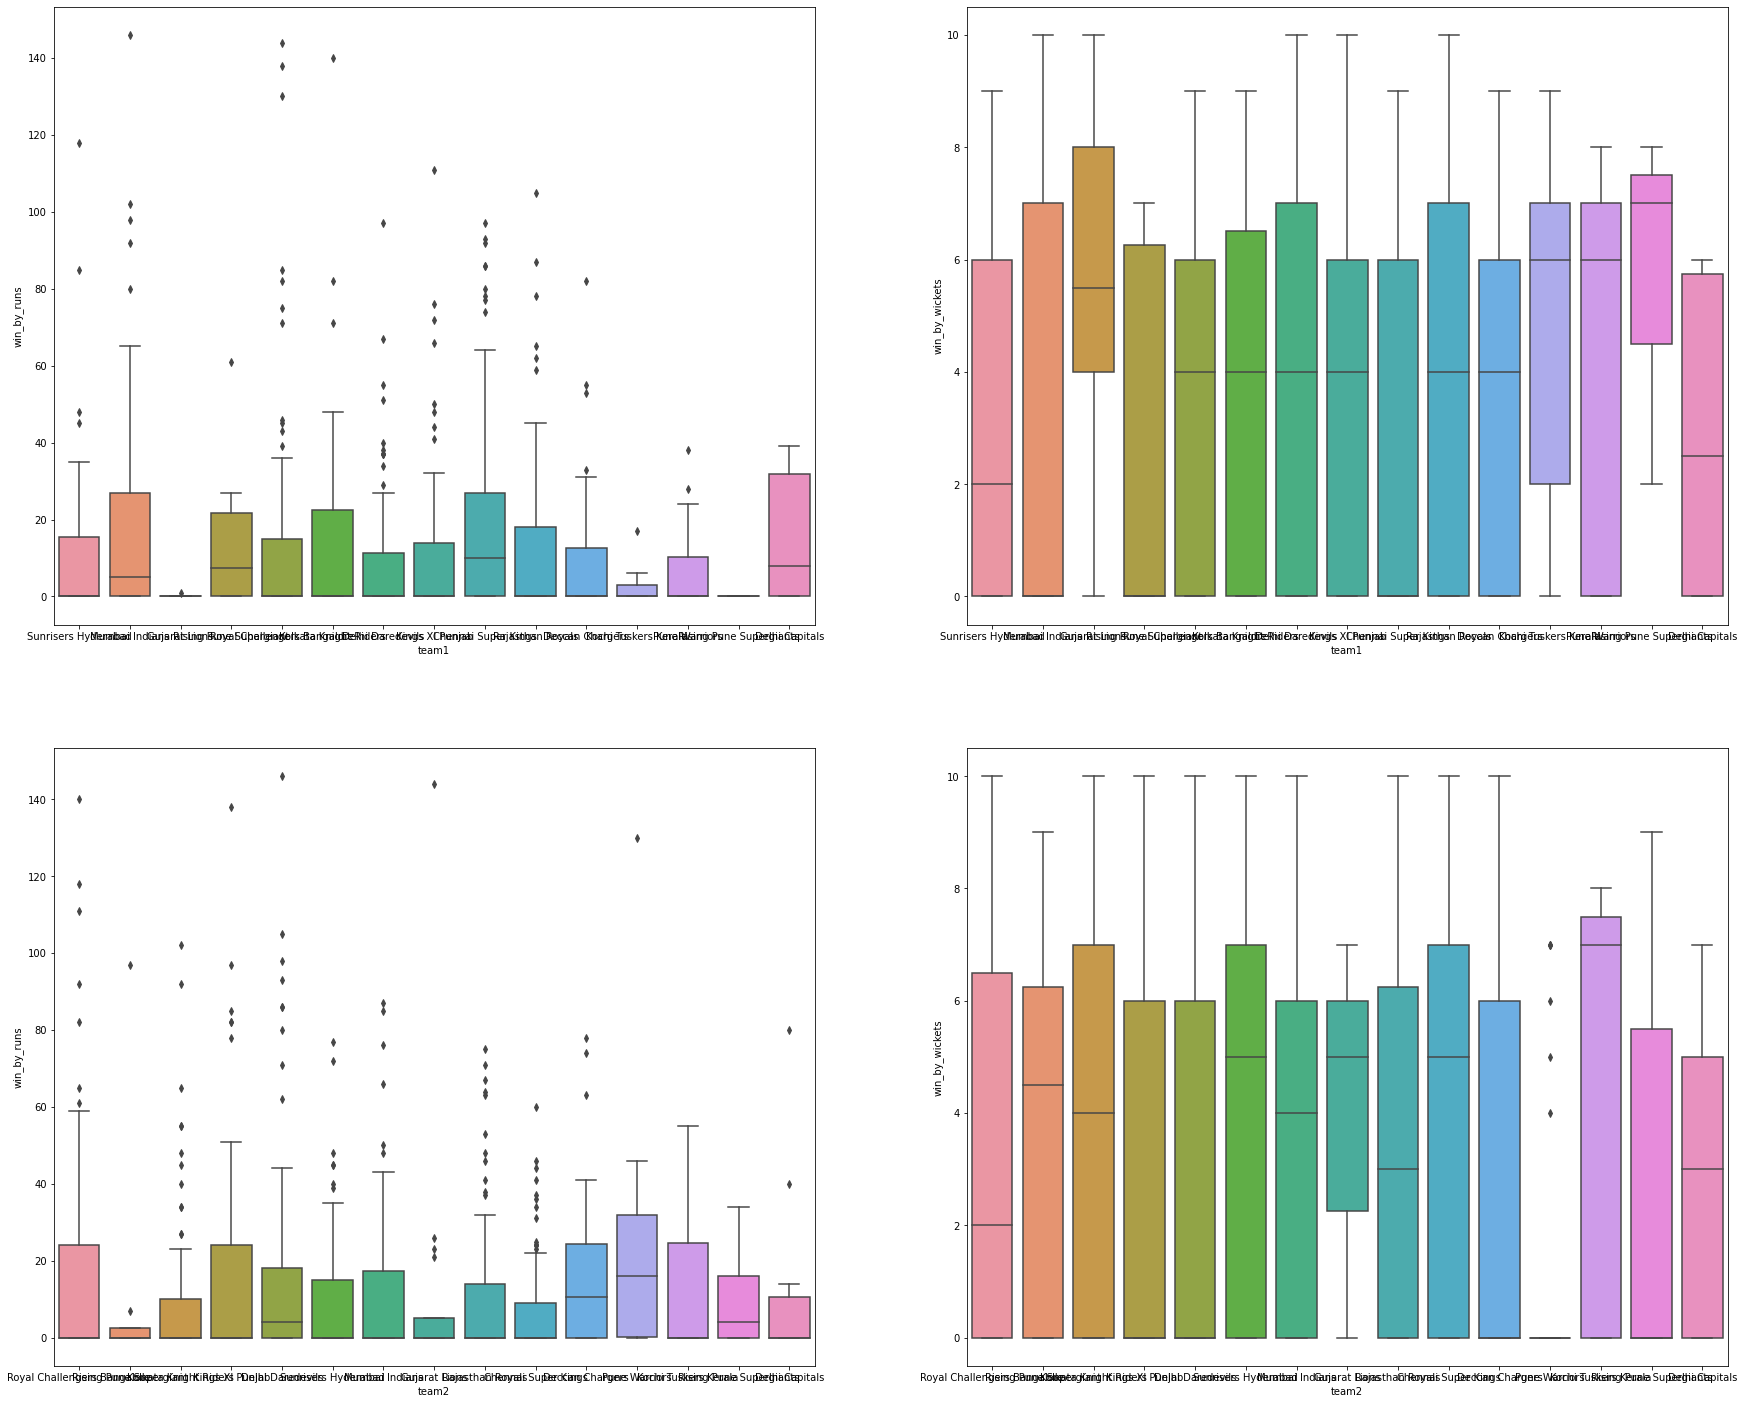

In [109]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(30,25))
sns.boxplot(y="win_by_runs",x="team1",data=data_match,orient='v',ax=axes[0,0])
sns.boxplot(y="win_by_wickets",x="team1",data=data_match,orient='v',ax=axes[0,1])
sns.boxplot(y="win_by_runs",x="team2",data=data_match,orient='v',ax=axes[1,0])
sns.boxplot(y="win_by_wickets",x="team2",data=data_match,orient='v',ax=axes[1,1])